In [3]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
print('done')

done


In [4]:
gold_data = pandas.read_csv('gld_price_data.csv')

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
gold_data.describe(include='all')

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
unique,2290,NaN,NaN,NaN,NaN,NaN
top,2/6/2012,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,1654.315776,122.732875,31.842221,20.084997,1.283653
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547
min,NaN,676.530029,70.000000,7.960000,8.850000,1.039047
25%,NaN,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,NaN,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,NaN,2073.010070,132.840004,37.827501,22.882499,1.369971


In [10]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
corr = gold_data.corr()

<AxesSubplot:>

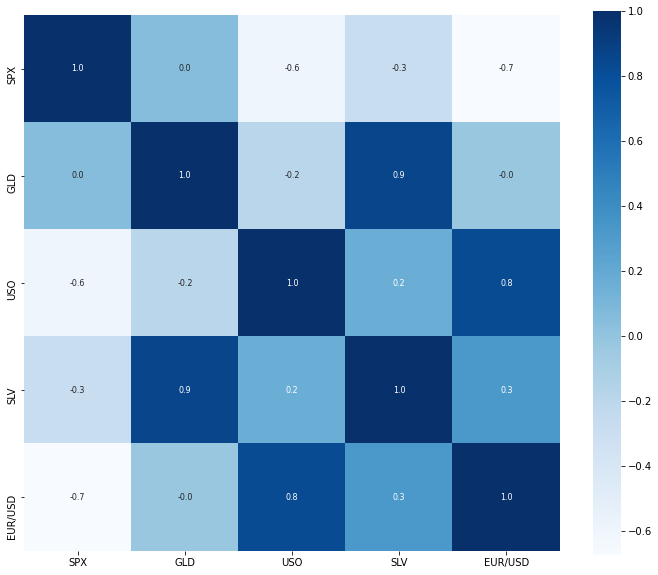

In [17]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, cbar=True, square=True,fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

In [18]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


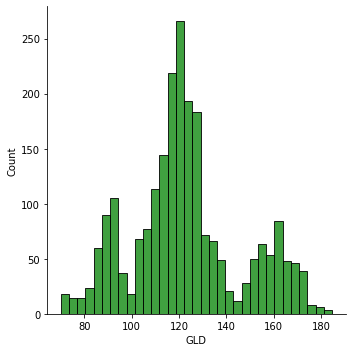

In [21]:
sns.displot(gold_data['GLD'], color='green')

In [22]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
reg = RandomForestRegressor(n_estimators=100)

In [25]:
reg.fit(X_train, Y_train)

RandomForestRegressor()

In [26]:
test_data_predic = reg.predict(X_test)
test_data_predic

array([168.5691987 ,  82.13389986, 115.72600059, 127.5672007 ,
       120.76690139, 154.73189757, 150.44449896, 126.08279999,
       117.57669876, 126.15430018, 116.63710082, 171.31260117,
       141.32369937, 168.0253988 , 115.15360004, 117.61770049,
       140.44190231, 170.256901  , 159.80530323, 159.18049964,
       154.90380041, 125.31390041, 176.1935    , 157.73990419,
       125.21340032,  93.65599973,  78.02879989, 120.9786998 ,
       119.09859927, 167.58120037,  88.20230024, 125.20770005,
        91.01430069, 117.72450052, 121.04449907, 136.1542013 ,
       115.47140122, 114.83380067, 146.94500032, 107.36600098,
       104.62320264,  87.36049795, 126.46530046, 117.87419993,
       154.54599913, 119.82210012, 108.62030014, 108.30639793,
        93.18090043, 127.24419758,  75.13690042, 113.56259915,
       121.06069998, 111.23309914, 118.82609874, 120.51279978,
       159.20330129, 169.13810089, 146.88299684,  85.73199855,
        94.52320043,  86.82969885,  90.36680012, 118.97

# R Squared

In [27]:
errer_score = metrics.r2_score(Y_test, test_data_predic)
errer_score

0.9894502528487149

## compare in a plot

In [28]:
Y_test = list(Y_test)

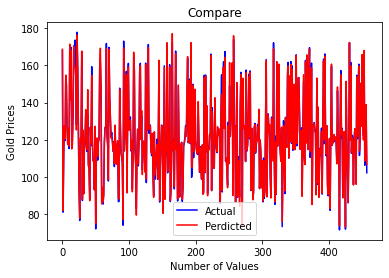

In [31]:
plt.plot(Y_test, color='blue', label='Actual')
plt.plot(test_data_predic, color='red', label='Perdicted')
plt.title("Compare")
plt.xlabel('Number of Values')
plt.ylabel("Gold Prices")
plt.legend()
plt.show()